In [1]:
# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

In [3]:
df = pd.read_csv("drive/My Drive/car_data/car_ads.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,NaN,None,man,5,7,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71


In [5]:
columns = df.columns

In [6]:
for column in columns:
    print(df[column].value_counts())
    print("___________________________")
    print("___________________________")

skoda            313830
volkswagen       297256
bmw              266731
mercedes-benz    251966
audi             248602
ford             240556
opel             217708
fiat             132669
citroen          121913
renault          106831
peugeot           92130
hyundai           80602
seat              74645
toyota            72908
nissan            68008
kia               48607
volvo             48271
mazda             45666
mini              35678
smart             32918
suzuki            31184
mitsubishi        28463
honda             26225
porsche           24317
chevrolet         20856
rover             20611
jeep              17075
lancia            13759
subaru            10107
jaguar            10056
chrysler           9296
dodge              5223
alfa-romeo         4734
lexus              3911
dacia              2024
maserati           1912
land-rover         1721
isuzu              1427
bentley            1081
hummer              731
lamborghini         554
infinity        

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552912 entries, 0 to 3552911
Data columns (total 16 columns):
 #   Column               Dtype  
---  ------               -----  
 0   maker                object 
 1   model                object 
 2   mileage              float64
 3   manufacture_year     float64
 4   engine_displacement  float64
 5   engine_power         float64
 6   body_type            object 
 7   color_slug           object 
 8   stk_year             object 
 9   transmission         object 
 10  door_count           object 
 11  seat_count           object 
 12  fuel_type            object 
 13  date_created         object 
 14  date_last_seen       object 
 15  price_eur            float64
dtypes: float64(5), object(11)
memory usage: 433.7+ MB


In [8]:
df.describe()

,mileage,manufacture_year,engine_displacement,engine_power,price_eur
count,3.190328e+06,3.182334e+06,2.809498e+06,2.998035e+06,3.552912e+06
mean,1.158140e+05,2.000871e+03,2.043958e+03,9.846796e+01,1.625812e+06
std,3.422508e+05,8.172588e+01,1.973958e+03,4.907309e+01,2.025622e+09
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e-02
25%,1.880000e+04,2.004000e+03,1.400000e+03,6.800000e+01,1.295340e+03
50%,8.641500e+04,2.009000e+03,1.798000e+03,8.600000e+01,7.364910e+03
75%,1.580250e+05,2.013000e+03,1.997000e+03,1.100000e+02,1.628423e+04
max,9.999999e+06,2.017000e+03,3.276700e+04,2.237000e+03,2.706149e+12


In [9]:
df.isna().sum()

maker                   518915
model                  1133361
mileage                 362584
manufacture_year        370578
engine_displacement     743414
engine_power            554877
body_type              1122914
color_slug             3343411
stk_year               1708156
transmission            741630
door_count              614373
seat_count              749489
fuel_type              1847606
date_created                 0
date_last_seen               0
price_eur                    0
dtype: int64

In [10]:
df.drop(["fuel_type","stk_year","color_slug","body_type"], inplace=True, axis=1)

In [11]:
df.head()

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,transmission,door_count,seat_count,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,man,5,7,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,man,5,5,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,man,5,5,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,man,5,5,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,man,5,5,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71


In [12]:
df.shape

(3552912, 12)

In [13]:
df.seat_count.replace("None",0, inplace=True)

In [14]:
df.describe()

,mileage,manufacture_year,engine_displacement,engine_power,price_eur
count,3.190328e+06,3.182334e+06,2.809498e+06,2.998035e+06,3.552912e+06
mean,1.158140e+05,2.000871e+03,2.043958e+03,9.846796e+01,1.625812e+06
std,3.422508e+05,8.172588e+01,1.973958e+03,4.907309e+01,2.025622e+09
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e-02
25%,1.880000e+04,2.004000e+03,1.400000e+03,6.800000e+01,1.295340e+03
50%,8.641500e+04,2.009000e+03,1.798000e+03,8.600000e+01,7.364910e+03
75%,1.580250e+05,2.013000e+03,1.997000e+03,1.100000e+02,1.628423e+04
max,9.999999e+06,2.017000e+03,3.276700e+04,2.237000e+03,2.706149e+12


In [15]:
df.dtypes

maker                   object
model                   object
mileage                float64
manufacture_year       float64
engine_displacement    float64
engine_power           float64
transmission            object
door_count              object
seat_count              object
date_created            object
date_last_seen          object
price_eur              float64
dtype: object

## Maker and Model

In [16]:
df.maker.unique()

array(['ford', 'skoda', 'bmw', nan, 'suzuki', 'nissan', 'opel', 'citroen',
       'seat', 'kia', 'audi', 'rover', 'toyota', 'hyundai', 'fiat',
       'volvo', 'chevrolet', 'mazda', 'jeep', 'mercedes-benz', 'subaru',
       'chrysler', 'lancia', 'smart', 'honda', 'porsche', 'dodge',
       'mitsubishi', 'mini', 'jaguar', 'lexus', 'hummer', 'bentley',
       'tesla', 'maserati', 'isuzu', 'lamborghini', 'lotus', 'volkswagen',
       'peugeot', 'renault', 'alfa-romeo', 'infinity', 'rolls-royce',
       'aston-martin', 'land-rover', 'dacia'], dtype=object)

In [17]:
df.maker.value_counts()

skoda            313830
volkswagen       297256
bmw              266731
mercedes-benz    251966
audi             248602
ford             240556
opel             217708
fiat             132669
citroen          121913
renault          106831
peugeot           92130
hyundai           80602
seat              74645
toyota            72908
nissan            68008
kia               48607
volvo             48271
mazda             45666
mini              35678
smart             32918
suzuki            31184
mitsubishi        28463
honda             26225
porsche           24317
chevrolet         20856
rover             20611
jeep              17075
lancia            13759
subaru            10107
jaguar            10056
chrysler           9296
dodge              5223
alfa-romeo         4734
lexus              3911
dacia              2024
maserati           1912
land-rover         1721
isuzu              1427
bentley            1081
hummer              731
lamborghini         554
infinity        

In [18]:
df.model.unique()

array(['galaxy', 'octavia', nan, ..., '125d', 'glk200-cdi', '760i'],
      dtype=object)

In [19]:
df.maker.isna().sum()

518915

In [20]:
df.model.isna().sum()

1133361

In [21]:
df = df[df["maker"].isna() | df["model"].isna() == False]

In [22]:
df["car"] = df["maker"] +"-"+ df["model"]

In [23]:
df.drop(["maker", "model"], axis=1, inplace=True)

In [24]:
df.head()

,mileage,manufacture_year,engine_displacement,engine_power,transmission,door_count,seat_count,date_created,date_last_seen,price_eur,car
0,151000.0,2011.0,2000.0,103.0,man,5,7,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75,ford-galaxy
1,143476.0,2012.0,2000.0,81.0,man,5,5,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31,skoda-octavia
3,111970.0,2004.0,1200.0,47.0,man,5,5,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77,skoda-fabia
4,128886.0,2004.0,1200.0,47.0,man,5,5,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71,skoda-fabia
5,140932.0,2003.0,1200.0,40.0,man,5,5,2015-11-14 18:10:06.894643+00,2016-01-27 20:40:15.46361+00,1628.42,skoda-fabia


## Date Time
* Created - Last Seen = Total ad duration

In [25]:
df['date_created'] = pd.to_datetime(df['date_created']).dt.normalize()
df['date_last_seen'] = pd.to_datetime(df['date_last_seen']).dt.normalize()
df['time_diff'] = (df['date_last_seen'] - df['date_created']).dt.days

In [26]:
df.head()

,mileage,manufacture_year,engine_displacement,engine_power,transmission,door_count,seat_count,date_created,date_last_seen,price_eur,car,time_diff
0,151000.0,2011.0,2000.0,103.0,man,5,7,2015-11-14 00:00:00+00:00,2016-01-27 00:00:00+00:00,10584.75,ford-galaxy,74
1,143476.0,2012.0,2000.0,81.0,man,5,5,2015-11-14 00:00:00+00:00,2016-01-27 00:00:00+00:00,8882.31,skoda-octavia,74
3,111970.0,2004.0,1200.0,47.0,man,5,5,2015-11-14 00:00:00+00:00,2016-01-27 00:00:00+00:00,2960.77,skoda-fabia,74
4,128886.0,2004.0,1200.0,47.0,man,5,5,2015-11-14 00:00:00+00:00,2016-01-27 00:00:00+00:00,2738.71,skoda-fabia,74
5,140932.0,2003.0,1200.0,40.0,man,5,5,2015-11-14 00:00:00+00:00,2016-01-27 00:00:00+00:00,1628.42,skoda-fabia,74


In [27]:
df.drop(["date_created", "date_last_seen"], axis=1, inplace=True)

In [28]:
df.head()

,mileage,manufacture_year,engine_displacement,engine_power,transmission,door_count,seat_count,price_eur,car,time_diff
0,151000.0,2011.0,2000.0,103.0,man,5,7,10584.75,ford-galaxy,74
1,143476.0,2012.0,2000.0,81.0,man,5,5,8882.31,skoda-octavia,74
3,111970.0,2004.0,1200.0,47.0,man,5,5,2960.77,skoda-fabia,74
4,128886.0,2004.0,1200.0,47.0,man,5,5,2738.71,skoda-fabia,74
5,140932.0,2003.0,1200.0,40.0,man,5,5,1628.42,skoda-fabia,74


In [29]:
df.seat_count.unique()

array(['7', '5', '4', 0, '9', '2', '6', '8', '3', '1', '18', '50', '12',
       '74', '10', '54', '14', '13', '15', '17', '56', '20', '11', nan,
       5.0, 4.0, 7.0, 2.0, 8.0, 6.0, 9.0, 3.0, 1.0, 17.0, 18.0, 15.0,
       58.0, 10.0, 45.0, 13.0, 55.0, 12.0, 54.0, 16.0, 57.0, 74.0, 50.0,
       512.0, 14.0, 515.0, 52.0, 85.0, 517.0, 43.0], dtype=object)

In [30]:
df["seat_count"].replace(np.nan,df["seat_count"].mode()[0], inplace=True)

In [31]:
df["seat_count"].isna().sum()

0

In [32]:
df["seat_count"] = df["seat_count"].astype(int)

In [33]:
df.head()

,mileage,manufacture_year,engine_displacement,engine_power,transmission,door_count,seat_count,price_eur,car,time_diff
0,151000.0,2011.0,2000.0,103.0,man,5,7,10584.75,ford-galaxy,74
1,143476.0,2012.0,2000.0,81.0,man,5,5,8882.31,skoda-octavia,74
3,111970.0,2004.0,1200.0,47.0,man,5,5,2960.77,skoda-fabia,74
4,128886.0,2004.0,1200.0,47.0,man,5,5,2738.71,skoda-fabia,74
5,140932.0,2003.0,1200.0,40.0,man,5,5,1628.42,skoda-fabia,74


In [34]:
df["seat_count"].value_counts()

5      1814338
0       274005
4       173396
7        79442
2        42770
3        15214
6         8640
9         7414
8         4054
1          151
17          21
12          21
10          16
45          10
18           9
15           8
58           6
13           5
14           5
54           4
16           3
50           3
55           2
56           2
74           2
512          2
515          1
11           1
20           1
43           1
52           1
57           1
85           1
517          1
Name: seat_count, dtype: int64

In [35]:
df = df[df["seat_count"] < 10]

In [36]:
df.head()

,mileage,manufacture_year,engine_displacement,engine_power,transmission,door_count,seat_count,price_eur,car,time_diff
0,151000.0,2011.0,2000.0,103.0,man,5,7,10584.75,ford-galaxy,74
1,143476.0,2012.0,2000.0,81.0,man,5,5,8882.31,skoda-octavia,74
3,111970.0,2004.0,1200.0,47.0,man,5,5,2960.77,skoda-fabia,74
4,128886.0,2004.0,1200.0,47.0,man,5,5,2738.71,skoda-fabia,74
5,140932.0,2003.0,1200.0,40.0,man,5,5,1628.42,skoda-fabia,74


## Door Count

In [37]:
df.door_count.value_counts()

5.0     669449
4.0     352067
4       308735
None    233846
2.0     101843
3.0      94699
2        87683
5        77064
3         9149
0.0       5852
6.0        638
6          115
1.0         74
7.0         31
55.0         9
1            5
9.0          4
58.0         3
54.0         1
7            1
45.0         1
22.0         1
8.0          1
77.0         1
49.0         1
Name: door_count, dtype: int64

In [38]:
df.door_count.isna().sum()

478151

In [39]:
df["door_count"].replace(np.nan,df["door_count"].mode()[0], inplace=True)
df["door_count"].replace('None',df["door_count"].mode()[0], inplace=True)

In [40]:
df["door_count"].isna().sum()

0

In [41]:
df["door_count"] = df["door_count"].astype(int)

In [42]:
df.head()

,mileage,manufacture_year,engine_displacement,engine_power,transmission,door_count,seat_count,price_eur,car,time_diff
0,151000.0,2011.0,2000.0,103.0,man,5,7,10584.75,ford-galaxy,74
1,143476.0,2012.0,2000.0,81.0,man,5,5,8882.31,skoda-octavia,74
3,111970.0,2004.0,1200.0,47.0,man,5,5,2960.77,skoda-fabia,74
4,128886.0,2004.0,1200.0,47.0,man,5,5,2738.71,skoda-fabia,74
5,140932.0,2003.0,1200.0,40.0,man,5,5,1628.42,skoda-fabia,74


In [43]:
df["door_count"].value_counts()

5     1458510
4      660802
2      189526
3      103848
0        5852
6         753
1          79
7          32
55          9
9           4
58          3
77          1
22          1
45          1
49          1
54          1
8           1
Name: door_count, dtype: int64

In [44]:
df = df[df["door_count"] < 7]

In [45]:
df.head()

,mileage,manufacture_year,engine_displacement,engine_power,transmission,door_count,seat_count,price_eur,car,time_diff
0,151000.0,2011.0,2000.0,103.0,man,5,7,10584.75,ford-galaxy,74
1,143476.0,2012.0,2000.0,81.0,man,5,5,8882.31,skoda-octavia,74
3,111970.0,2004.0,1200.0,47.0,man,5,5,2960.77,skoda-fabia,74
4,128886.0,2004.0,1200.0,47.0,man,5,5,2738.71,skoda-fabia,74
5,140932.0,2003.0,1200.0,40.0,man,5,5,1628.42,skoda-fabia,74


In [46]:
df.describe()

,mileage,manufacture_year,engine_displacement,engine_power,door_count,seat_count,price_eur,time_diff
count,2.184128e+06,2.177481e+06,1.964523e+06,2.093672e+06,2.419370e+06,2.419370e+06,2.419370e+06,2.419370e+06
mean,1.140107e+05,2.001241e+03,1.937215e+03,9.279849e+01,4.394099e+00,4.382729e+00,1.156869e+06,7.502198e+01
std,3.403956e+05,8.215163e+01,1.902151e+03,4.530085e+01,9.187190e-01,1.704766e+00,1.739911e+09,5.582366e+01
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,4.000000e-02,0.000000e+00
25%,1.800000e+04,2.004000e+03,1.390000e+03,6.600000e+01,4.000000e+00,5.000000e+00,1.295340e+03,1.400000e+01
50%,8.600000e+04,2.009000e+03,1.600000e+03,8.100000e+01,5.000000e+00,5.000000e+00,6.200000e+03,6.700000e+01
75%,1.566322e+05,2.013000e+03,1.989000e+03,1.060000e+02,5.000000e+00,5.000000e+00,1.463357e+04,1.280000e+02
max,9.999999e+06,2.017000e+03,3.276700e+04,2.033000e+03,6.000000e+00,9.000000e+00,2.706149e+12,1.800000e+02


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2419370 entries, 0 to 3552910
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   mileage              float64
 1   manufacture_year     float64
 2   engine_displacement  float64
 3   engine_power         float64
 4   transmission         object 
 5   door_count           int64  
 6   seat_count           int64  
 7   price_eur            float64
 8   car                  object 
 9   time_diff            int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 203.0+ MB


In [48]:
df.head()

,mileage,manufacture_year,engine_displacement,engine_power,transmission,door_count,seat_count,price_eur,car,time_diff
0,151000.0,2011.0,2000.0,103.0,man,5,7,10584.75,ford-galaxy,74
1,143476.0,2012.0,2000.0,81.0,man,5,5,8882.31,skoda-octavia,74
3,111970.0,2004.0,1200.0,47.0,man,5,5,2960.77,skoda-fabia,74
4,128886.0,2004.0,1200.0,47.0,man,5,5,2738.71,skoda-fabia,74
5,140932.0,2003.0,1200.0,40.0,man,5,5,1628.42,skoda-fabia,74


In [49]:
len(df)

2419370

In [50]:
df["transmission"].isna().sum()

495343

In [51]:
len(df)

2419370

In [52]:
df.dropna(inplace=True)
df.shape

(1482311, 10)

In [53]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df["transmission"] = le.fit_transform(df.transmission.values)

In [54]:
df.transmission = df.transmission + 1

In [55]:
df.head(10)

,mileage,manufacture_year,engine_displacement,engine_power,transmission,door_count,seat_count,price_eur,car,time_diff
0,151000.0,2011.0,2000.0,103.0,2,5,7,10584.75,ford-galaxy,74
1,143476.0,2012.0,2000.0,81.0,2,5,5,8882.31,skoda-octavia,74
3,111970.0,2004.0,1200.0,47.0,2,5,5,2960.77,skoda-fabia,74
4,128886.0,2004.0,1200.0,47.0,2,5,5,2738.71,skoda-fabia,74
5,140932.0,2003.0,1200.0,40.0,2,5,5,1628.42,skoda-fabia,74
6,167220.0,2001.0,1400.0,74.0,2,5,5,2072.54,skoda-fabia,74
8,105389.0,2003.0,1900.0,81.0,2,5,5,4293.12,skoda-octavia,74
13,41250.0,1990.0,1300.0,44.0,2,5,5,370.10,skoda-favorit,74
14,122100.0,2003.0,1000.0,39.0,2,5,5,999.26,suzuki-swift,74
15,149465.0,2005.0,2500.0,121.0,1,5,5,4811.25,nissan-x-trail,74


## Manufacture Year

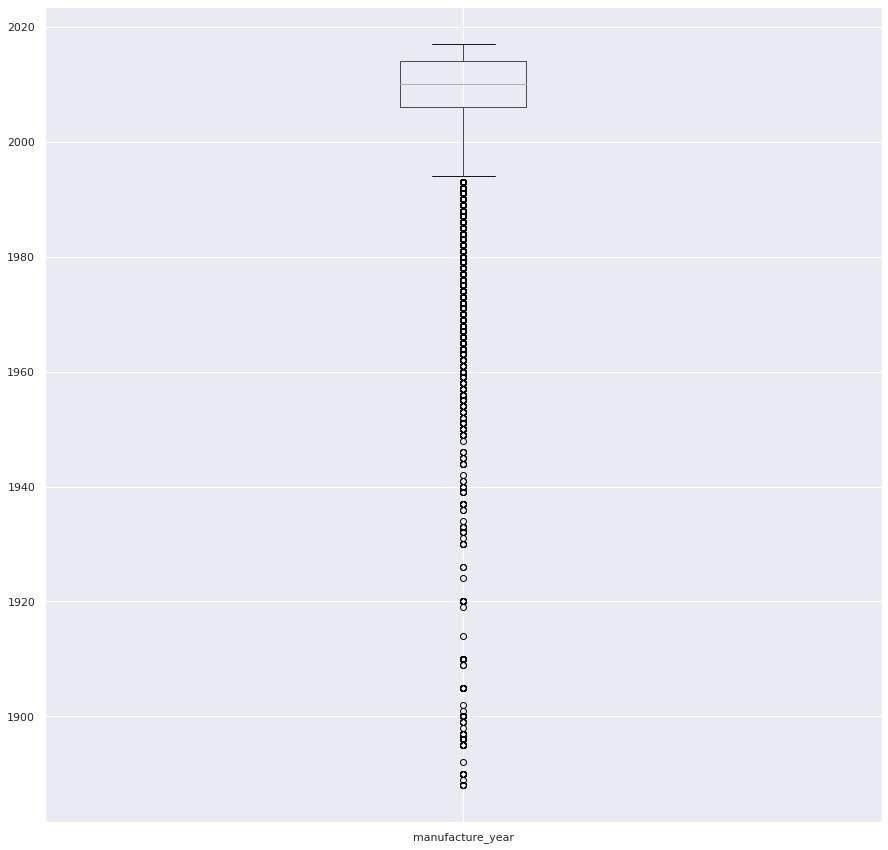

In [ ]:
df.boxplot(column=['manufacture_year'], return_type='axes', figsize=(15,15))

In [137]:
df = df[df.manufacture_year > 1990]
df = df[df.manufacture_year < 2020]

# Engine Displacement and Engine Power

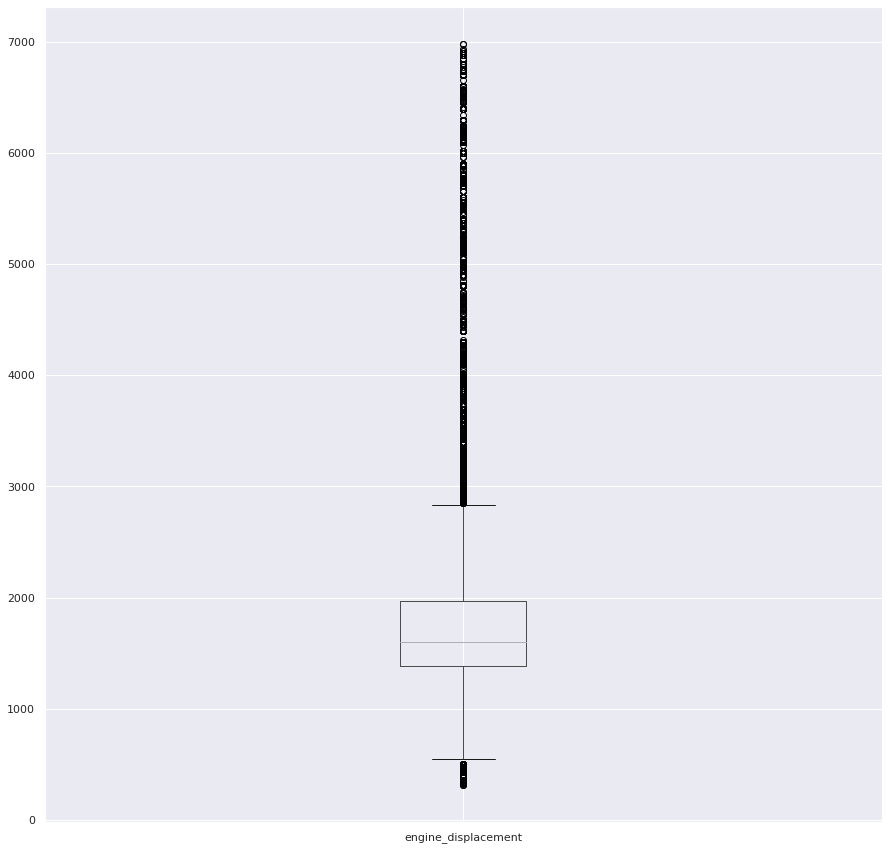

In [138]:
df.boxplot(column=['engine_displacement'], return_type='axes', figsize=(15,15));

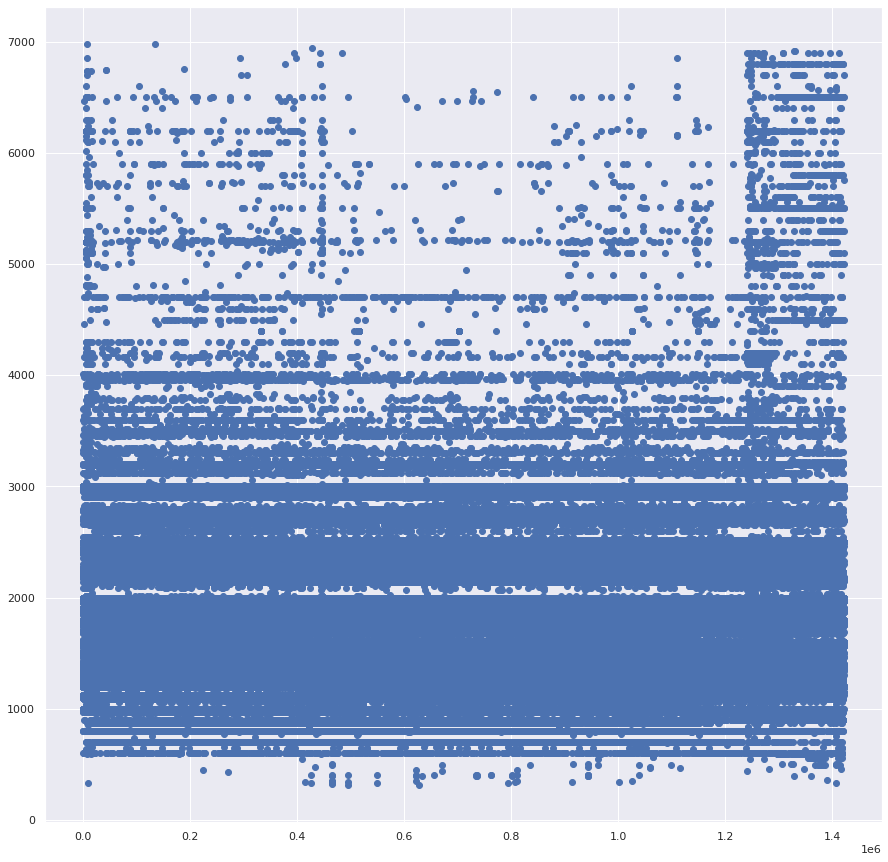

In [139]:
plt.figure(figsize=(15,15))
plt.scatter(range(len(df)),df.engine_displacement)

In [140]:
df = df[df.engine_displacement > 300]
df = df[df.engine_displacement < 7000]


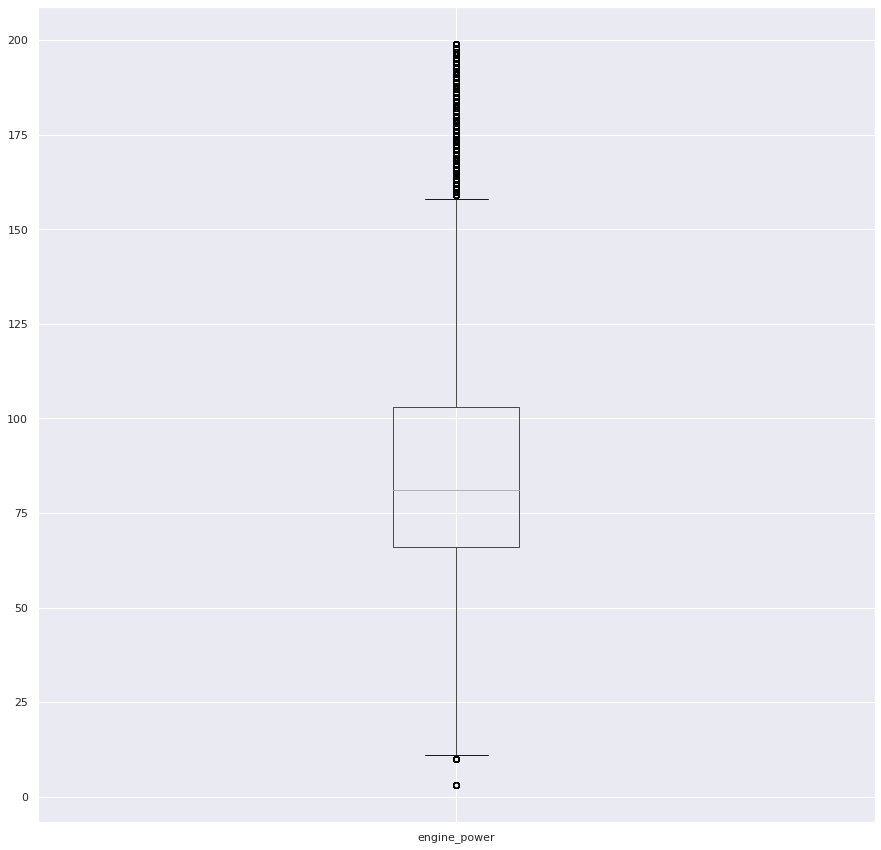

In [141]:
df.boxplot(column=['engine_power'], return_type='axes', figsize=(15,15))

In [142]:
df = df[df.engine_power < 200]

In [143]:
df.shape

(1421344, 10)

In [144]:
df.isna().sum()

mileage                0
manufacture_year       0
engine_displacement    0
engine_power           0
transmission           0
door_count             0
seat_count             0
price_eur              0
car                    0
time_diff              0
dtype: int64

(array([285063.,  98694.,  68932., 161721.,  18326.,   6000., 281695.,
        453772.,  11725.,  35416.]),
 array([  0.,  18.,  36.,  54.,  72.,  90., 108., 126., 144., 162., 180.]),
 <a list of 10 Patch objects>)

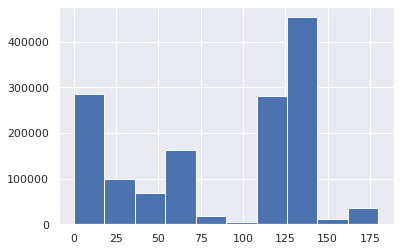

In [145]:
plt.hist(df.time_diff)

(array([4.917700e+04, 7.100000e+01, 3.298700e+04, 1.161400e+04,
        1.373840e+05, 1.110562e+06, 6.918000e+03, 6.370900e+04,
        3.144000e+03, 5.778000e+03]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

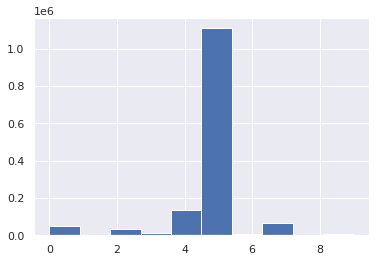

In [146]:
plt.hist(df.seat_count)

(array([3.60000e+01, 0.00000e+00, 1.41019e+05, 0.00000e+00, 8.67360e+04,
        0.00000e+00, 5.15098e+05, 0.00000e+00, 6.77946e+05, 5.09000e+02]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

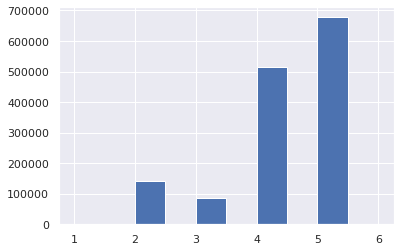

In [147]:
plt.hist(df.door_count)

In [148]:
df.transmission.value_counts()

2    1137087
1     284257
Name: transmission, dtype: int64

In [149]:
df.car.nunique()

881

Text(0.5, 1.0, 'Top 10 car brands on sale')

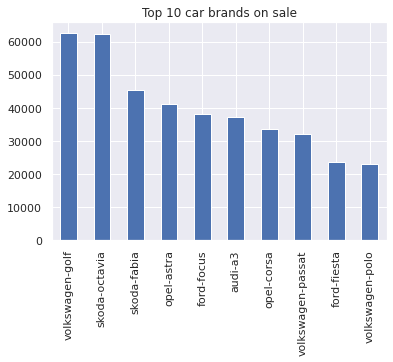

In [150]:
import pandas_profiling


df.car.value_counts().head(10).plot.bar()
plt.title("Top 10 car brands on sale")

In [151]:
df.head()

,mileage,manufacture_year,engine_displacement,engine_power,transmission,door_count,seat_count,price_eur,car,time_diff
0,151000.0,2011.0,2000.0,103.0,2,5,7,10584.75,ford-galaxy,74
1,143476.0,2012.0,2000.0,81.0,2,5,5,8882.31,skoda-octavia,74
3,111970.0,2004.0,1200.0,47.0,2,5,5,2960.77,skoda-fabia,74
4,128886.0,2004.0,1200.0,47.0,2,5,5,2738.71,skoda-fabia,74
5,140932.0,2003.0,1200.0,40.0,2,5,5,1628.42,skoda-fabia,74


In [152]:
df[df.price_eur.isin(df.price_eur.nlargest())].sort_values(['car','mileage','engine_power','transmission','price_eur'])

,mileage,manufacture_year,engine_displacement,engine_power,transmission,door_count,seat_count,price_eur,car,time_diff
1745328,162000.0,2013.0,1968.0,130.0,1,5,4,2.600000e+07,audi-a5,137
2506165,93000.0,2012.0,1242.0,51.0,1,3,4,8.800000e+06,fiat-500,120
1461682,55000.0,2012.0,1248.0,70.0,2,5,4,9.500000e+06,lancia-y,143
2042604,130000.0,2005.0,1198.0,47.0,2,3,5,1.000000e+09,seat-ibiza,130
1139074,33000.0,2014.0,1968.0,135.0,2,4,5,2.280169e+07,seat-leon,10


Text(0.5, 1.0, 'Most preferred Door Counts')

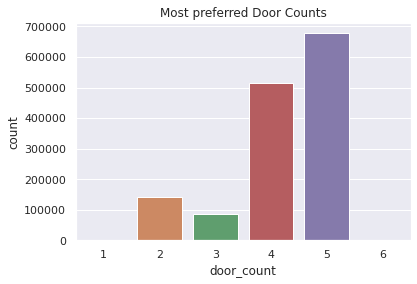

In [153]:
sns.countplot(x='door_count', data=df, orient='h')
plt.title("Most preferred Door Counts")

Text(0.5, 1.0, 'Most preferred Seat Counts')

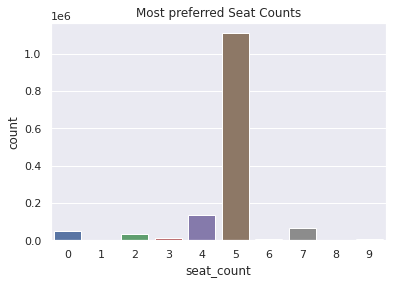

In [154]:
sns.countplot(x='seat_count', data=df, orient='h')
plt.title("Most preferred Seat Counts")

Text(0.5, 1.0, 'year - price lineplot (1886 - 2020)')

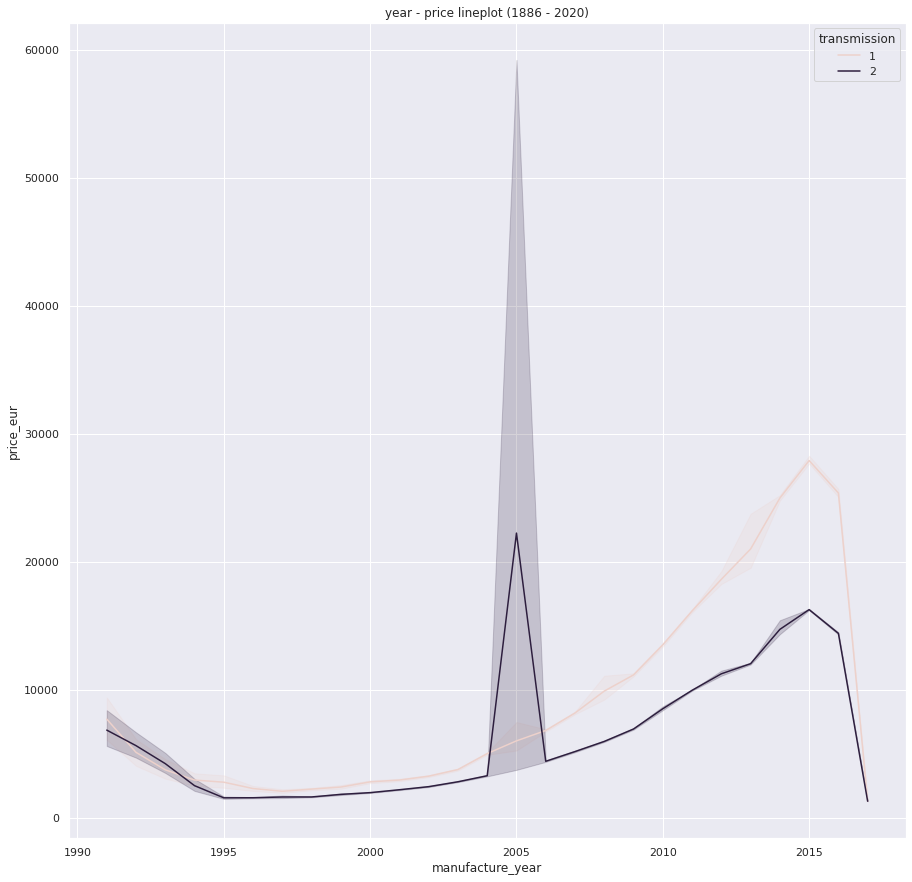

In [155]:
plt.figure(figsize=(15,15))
sns.lineplot(data=df, y='price_eur', x='manufacture_year', hue='transmission')
plt.title("year - price lineplot (1886 - 2020)")

In [156]:
df.manufacture_year.value_counts()

2015.0    228901
2012.0    121783
2011.0    114202
2014.0     92660
2013.0     81173
2010.0     80599
2007.0     75060
2008.0     74183
2009.0     72607
2006.0     71392
2005.0     63262
2016.0     62769
2004.0     55225
2003.0     47170
2002.0     39500
2001.0     35745
2000.0     29643
1999.0     25221
1998.0     17109
1997.0     10892
1996.0      7008
1995.0      4326
2017.0      2762
1994.0      2674
1993.0      1992
1992.0      1904
1991.0      1582
Name: manufacture_year, dtype: int64

In [156]:
df.head()

In [157]:
df.shape

(1421344, 10)

In [158]:
df.describe()

,mileage,manufacture_year,engine_displacement,engine_power,transmission,door_count,seat_count,price_eur,time_diff
count,1.421344e+06,1.421344e+06,1.421344e+06,1.421344e+06,1.421344e+06,1.421344e+06,1.421344e+06,1.421344e+06,1.421344e+06
mean,1.022471e+05,2.009254e+03,1.694732e+03,8.741687e+01,1.800008e+00,4.218161e+00,4.761590e+00,1.105748e+04,8.619353e+01
std,1.790903e+05,5.221334e+00,4.849097e+02,3.113165e+01,3.999939e-01,9.428293e-01,1.190068e+00,8.394971e+05,5.326150e+01
min,0.000000e+00,1.991000e+03,3.110000e+02,3.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,4.000000e-02,0.000000e+00
25%,2.501000e+04,2.006000e+03,1.388000e+03,6.600000e+01,2.000000e+00,4.000000e+00,5.000000e+00,2.500000e+03,2.900000e+01
50%,8.807500e+04,2.010000e+03,1.598000e+03,8.100000e+01,2.000000e+00,4.000000e+00,5.000000e+00,7.962660e+03,1.170000e+02
75%,1.519500e+05,2.014000e+03,1.968000e+03,1.030000e+02,2.000000e+00,5.000000e+00,5.000000e+00,1.490000e+04,1.310000e+02
max,9.999999e+06,2.017000e+03,6.980000e+03,1.990000e+02,2.000000e+00,6.000000e+00,9.000000e+00,1.000000e+09,1.800000e+02


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1421344 entries, 0 to 3552905
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   mileage              1421344 non-null  float64
 1   manufacture_year     1421344 non-null  float64
 2   engine_displacement  1421344 non-null  float64
 3   engine_power         1421344 non-null  float64
 4   transmission         1421344 non-null  int64  
 5   door_count           1421344 non-null  int64  
 6   seat_count           1421344 non-null  int64  
 7   price_eur            1421344 non-null  float64
 8   car                  1421344 non-null  object 
 9   time_diff            1421344 non-null  int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 119.3+ MB


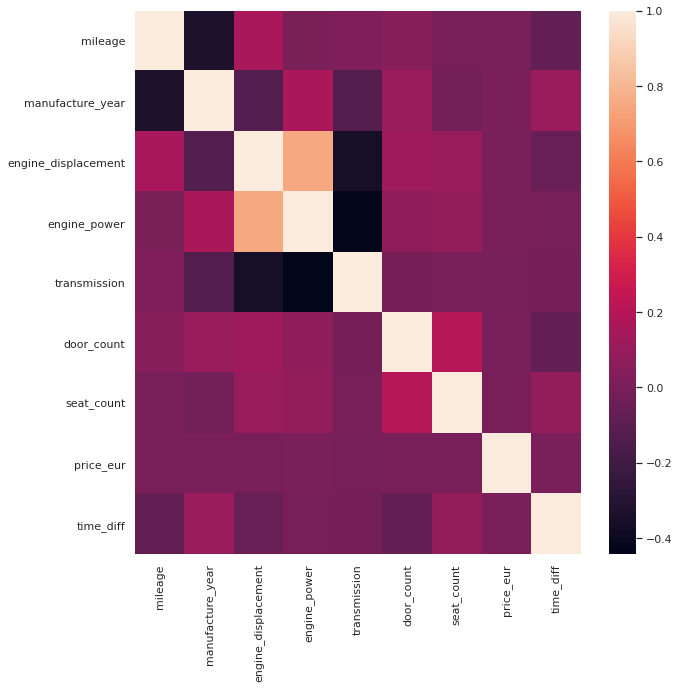

In [162]:
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

So, this is it. We have successfully performed the EDA operation.